In [31]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

df = pd.read_csv('/content/movies.csv')
df1= pd.read_csv('/content/ratings.csv')
df2= pd.read_csv('/content/tags.csv')
df3= pd.read_csv('/content/links.csv')


In [11]:
df.shape

(9742, 3)

In [12]:
df1.shape

(100836, 4)

In [9]:
df2.shape

(3683, 4)

In [10]:
df3.shape

(9742, 3)

In [15]:
unique_user_ids = df1['userId'].nunique()

print(unique_user_ids)

610


In [26]:
import pandas as pd

ratings_count = df1['movieId'].value_counts()

max_rated_movie_id = ratings_count.idxmax()
max_rated_movie_title = df.loc[df['movieId'] == max_rated_movie_id, 'title'].values[0]

print(f"The movie with the maximum number of user ratings is '{max_rated_movie_title}' (movieId: {max_rated_movie_id})")


The movie with the maximum number of user ratings is 'Forrest Gump (1994)' (movieId: 356)


In [23]:
user_row = df[df['movieId'] == 47]
print(user_row)

    movieId                        title            genres
43       47  Seven (a.k.a. Se7en) (1995)  Mystery|Thriller


In [30]:
terminator_movie_id = df.loc[df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

terminator_ratings = df1[df1['movieId'] == terminator_movie_id]

average_rating = terminator_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


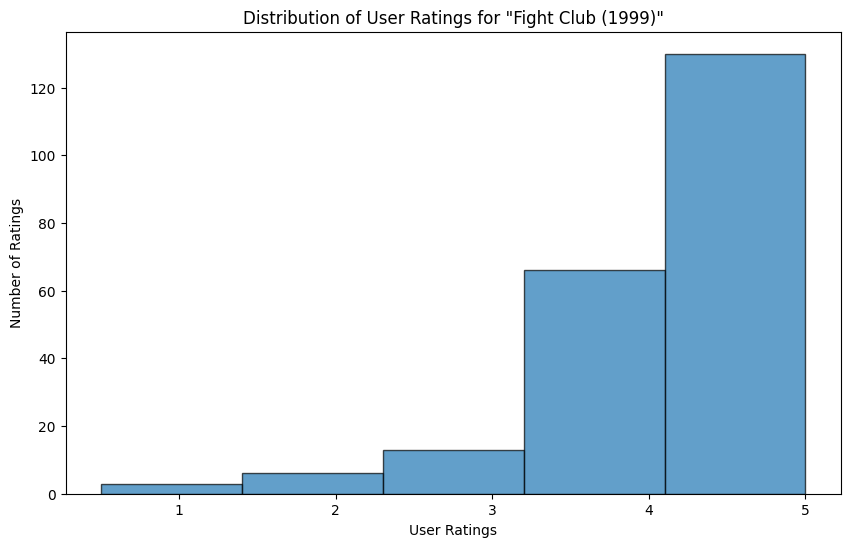

In [33]:
fight_club_movie_id = df.loc[df['title'] == 'Fight Club (1999)', 'movieId'].values[0]

fight_club_ratings = df1[df1['movieId'] == fight_club_movie_id]

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Number of Ratings')
plt.show()

In [34]:
grouped_ratings = df1.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'ratingCount', 'averageRating']

merged_df = pd.merge(df, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['ratingCount'] > 50]

print(filtered_df)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  ratingCount  averageRating  
0     Adventure|Animation|Children|Comedy|Fantasy          215       3.920930  
1                      Adventure|Children|Fantasy          110       3.431818  
2                                  Comedy|Romance           52       3.259615  
5                           Action|Crime|Thriller          102     

In [35]:
most_popular_movie = filtered_df.loc[filtered_df['averageRating'].idxmax()]

print(f"The most popular movie based on average user ratings is '{most_popular_movie['title']}' "
      f"with an average rating of {most_popular_movie['averageRating']:.2f}")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43


In [36]:
top_movies_by_ratings = filtered_df.sort_values(by='ratingCount', ascending=False)

top_5_movies = top_movies_by_ratings.head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'ratingCount']])

Top 5 popular movies based on number of user ratings:
                                 title  ratingCount
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


In [37]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, regex=False)]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='ratingCount', ascending=False)

third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi_movie['title']}' "
      f"with {third_most_popular_sci_fi_movie['ratingCount']} user ratings.")


The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 user ratings.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


merged_df_with_links = pd.merge(filtered_df, df3, on='movieId', how='inner')


def scrape_imdb_rating(imdb_id):
    imdb_url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(imdb_url)
    soup = BeautifulSoup(response.text, 'html.parser')


    rating_element = soup.find('span', itemprop='ratingValue')


    if rating_element:
        rating = float(rating_element.text)
        return rating
    else:
        return None


highest_rating = 0.0
highest_rating_movie_id = None


for index, row in merged_df_with_links.iterrows():
    imdb_id = row['imdbId']


    if pd.notna(imdb_id):
        rating = scrape_imdb_rating(imdb_id)


        if rating is not None and rating > highest_rating:
            highest_rating = rating
            highest_rating_movie_id = row['movieId']


print(f"The movieId of the movie with the highest IMDB rating is: {highest_rating_movie_id}")


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

links_file_path = 'links.csv'


links_df = pd.read_csv(links_file_path)


merged_df_with_links = pd.merge(filtered_df, links_df, on='movieId', how='inner')


def scrape_imdb_rating(imdb_id):
    imdb_url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(imdb_url)
    soup = BeautifulSoup(response.text, 'html.parser')


    rating_element = soup.find('span', itemprop='ratingValue')


    if rating_element:
        rating = float(rating_element.text)
        return rating
    else:
        return None


highest_rating = 0.0
highest_rating_movie_id = None


for index, row in merged_df_with_links.iterrows():
    imdb_id = row['imdbId']
    genres = row['genres']


    if pd.notna(imdb_id) and 'Sci-Fi' in genres:
        rating = scrape_imdb_rating(imdb_id)


        if rating is not None and rating > highest_rating:
            highest_rating = rating
            highest_rating_movie_id = row['movieId']


print(f"The movieId of the Sci-Fi movie with the highest IMDB rating is: {highest_rating_movie_id}")
